In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


%matplotlib inline

In [2]:
# pip install wget
!python -m wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py 


Saved under helper_functions (8).py


In [3]:
from helper_functions import create_tensorboard_callback,  plot_loss_curves, unzip_data, walk_through_dir

In [4]:
!python -m wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip


Saved under 10_food_classes_10_percent (12).zip


In [5]:
unzip_data("10_food_classes_10_percent.zip")

In [6]:
walk_through_dir("10_food_classes_10_percent")

There are 2 directories and 0 images in '10_food_classes_10_percent'.
There are 10 directories and 0 images in '10_food_classes_10_percent\test'.
There are 0 directories and 250 images in '10_food_classes_10_percent\test\chicken_curry'.
There are 0 directories and 250 images in '10_food_classes_10_percent\test\chicken_wings'.
There are 0 directories and 250 images in '10_food_classes_10_percent\test\fried_rice'.
There are 0 directories and 250 images in '10_food_classes_10_percent\test\grilled_salmon'.
There are 0 directories and 250 images in '10_food_classes_10_percent\test\hamburger'.
There are 0 directories and 250 images in '10_food_classes_10_percent\test\ice_cream'.
There are 0 directories and 250 images in '10_food_classes_10_percent\test\pizza'.
There are 0 directories and 250 images in '10_food_classes_10_percent\test\ramen'.
There are 0 directories and 250 images in '10_food_classes_10_percent\test\steak'.
There are 0 directories and 250 images in '10_food_classes_10_percent

In [7]:
train_dir = "10_food_classes_10_percent/train/"
test_Dir = "10_food_classes_10_percent/test/"

In [8]:
import tensorflow as tf

In [9]:
from tensorflow.keras.preprocessing import image_dataset_from_directory

In [10]:
size = 32
shape=(224,224)

train_data = image_dataset_from_directory(train_dir, batch_size=size, image_size=shape, label_mode='categorical')
test_data = image_dataset_from_directory(test_Dir, batch_size=size, image_size=shape, label_mode ='categorical')

Found 750 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [11]:
train_data

<BatchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 10), dtype=tf.float32, name=None))>

In [12]:
train_data.class_names

['chicken_curry',
 'chicken_wings',
 'fried_rice',
 'grilled_salmon',
 'hamburger',
 'ice_cream',
 'pizza',
 'ramen',
 'steak',
 'sushi']

In [13]:
for images, labels in train_data.take(1):
    print(images, labels)

tf.Tensor(
[[[[1.09273117e+02 1.16273117e+02 1.08273117e+02]
   [1.08170601e+02 1.15170601e+02 1.07170601e+02]
   [1.08394928e+02 1.15394928e+02 1.07394928e+02]
   ...
   [9.05687790e+01 1.84549072e+02 2.32921661e+02]
   [9.73765717e+01 1.87936203e+02 2.37656387e+02]
   [9.69249649e+01 1.85398376e+02 2.37718796e+02]]

  [[1.04796082e+02 1.14930801e+02 1.03526627e+02]
   [1.04515152e+02 1.15039543e+02 1.02466354e+02]
   [1.01376907e+02 1.11376907e+02 1.00376907e+02]
   ...
   [8.93655777e+01 1.83541962e+02 2.31816498e+02]
   [8.91344147e+01 1.82707581e+02 2.31183197e+02]
   [9.12271271e+01 1.90226227e+02 2.39152542e+02]]

  [[1.00830200e+02 1.11830200e+02 9.56159134e+01]
   [1.07106667e+02 1.18106667e+02 1.01892380e+02]
   [1.04729912e+02 1.15729912e+02 9.95156250e+01]
   ...
   [8.91526108e+01 1.83387833e+02 2.29485886e+02]
   [8.61629639e+01 1.80837845e+02 2.26549591e+02]
   [8.14375916e+01 1.84848129e+02 2.29879227e+02]]

  ...

  [[1.90123154e+02 1.67544678e+02 9.15135880e+01]
   [1

In [14]:
base_model = tf.keras.applications.EfficientNetB0(include_top=False)
base_model.trainable = False

In [15]:
inputs = tf.keras.layers.Input(shape=(224, 224, 3), name="input_layer")
x = base_model(inputs)
print(f"Shape after base_model: {x.shape}")
x = tf.keras.layers.GlobalAveragePooling2D(name="global_average_pooling_layer")(x)
print(f"After GlobalAveragePooling2D(): {x.shape}")
outputs = tf.keras.layers.Dense(10, activation="softmax", name="output_layer")(x)
model_0 = tf.keras.Model(inputs, outputs)

Shape after base_model: (None, 7, 7, 1280)
After GlobalAveragePooling2D(): (None, 1280)


In [16]:
model_0.compile(loss='categorical_crossentropy',
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

In [17]:
istory = model_0.fit(train_data,epochs=5,steps_per_epoch=len(train_data),
                                 validation_data=test_data,
                                validation_steps=int(0.25 * len(test_data)), 
                                callbacks=[create_tensorboard_callback("transfer_learning", "10_percent_feature_extract")])

Saving TensorBoard log files to: transfer_learning/10_percent_feature_extract/20230110-225643
Epoch 1/5
24/24 [==============================] - 48s 2s/step - loss: 1.8615 - accuracy: 0.4213 - val_loss: 1.2959 - val_accuracy: 0.7500
Epoch 2/5
24/24 [==============================] - 38s 2s/step - loss: 1.1407 - accuracy: 0.7480 - val_loss: 0.8945 - val_accuracy: 0.8076
Epoch 3/5
24/24 [==============================] - 45s 2s/step - loss: 0.8322 - accuracy: 0.8093 - val_loss: 0.7326 - val_accuracy: 0.8355
Epoch 4/5
24/24 [==============================] - 45s 2s/step - loss: 0.6940 - accuracy: 0.8293 - val_loss: 0.6198 - val_accuracy: 0.8553
Epoch 5/5
24/24 [==============================] - 50s 2s/step - loss: 0.5870 - accuracy: 0.8520 - val_loss: 0.5773 - val_accuracy: 0.8553


In [18]:
base_model.summary()

Model: "efficientnetb0"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, None, None,  0           []                               
                                 3)]                                                              
                                                                                                  
 rescaling (Rescaling)          (None, None, None,   0           ['input_1[0][0]']                
                                3)                                                                
                                                                                                  
 normalization (Normalization)  (None, None, None,   7           ['rescaling[0][0]']              
                                3)                                                   

                                                                                                  
 block2a_project_conv (Conv2D)  (None, None, None,   2304        ['block2a_se_excite[0][0]']      
                                24)                                                               
                                                                                                  
 block2a_project_bn (BatchNorma  (None, None, None,   96         ['block2a_project_conv[0][0]']   
 lization)                      24)                                                               
                                                                                                  
 block2b_expand_conv (Conv2D)   (None, None, None,   3456        ['block2a_project_bn[0][0]']     
                                144)                                                              
                                                                                                  
 block2b_e

                                40)                                                               
                                                                                                  
 block3a_project_bn (BatchNorma  (None, None, None,   160        ['block3a_project_conv[0][0]']   
 lization)                      40)                                                               
                                                                                                  
 block3b_expand_conv (Conv2D)   (None, None, None,   9600        ['block3a_project_bn[0][0]']     
                                240)                                                              
                                                                                                  
 block3b_expand_bn (BatchNormal  (None, None, None,   960        ['block3b_expand_conv[0][0]']    
 ization)                       240)                                                              
          

 block4a_project_bn (BatchNorma  (None, None, None,   320        ['block4a_project_conv[0][0]']   
 lization)                      80)                                                               
                                                                                                  
 block4b_expand_conv (Conv2D)   (None, None, None,   38400       ['block4a_project_bn[0][0]']     
                                480)                                                              
                                                                                                  
 block4b_expand_bn (BatchNormal  (None, None, None,   1920       ['block4b_expand_conv[0][0]']    
 ization)                       480)                                                              
                                                                                                  
 block4b_expand_activation (Act  (None, None, None,   0          ['block4b_expand_bn[0][0]']      
 ivation) 

                                                                                                  
 block4c_add (Add)              (None, None, None,   0           ['block4c_drop[0][0]',           
                                80)                               'block4b_add[0][0]']            
                                                                                                  
 block5a_expand_conv (Conv2D)   (None, None, None,   38400       ['block4c_add[0][0]']            
                                480)                                                              
                                                                                                  
 block5a_expand_bn (BatchNormal  (None, None, None,   1920       ['block5a_expand_conv[0][0]']    
 ization)                       480)                                                              
                                                                                                  
 block5a_e

                                672)                                                              
                                                                                                  
 block5c_expand_bn (BatchNormal  (None, None, None,   2688       ['block5c_expand_conv[0][0]']    
 ization)                       672)                                                              
                                                                                                  
 block5c_expand_activation (Act  (None, None, None,   0          ['block5c_expand_bn[0][0]']      
 ivation)                       672)                                                              
                                                                                                  
 block5c_dwconv (DepthwiseConv2  (None, None, None,   16800      ['block5c_expand_activation[0][0]
 D)                             672)                             ']                               
          

 block6b_expand_bn (BatchNormal  (None, None, None,   4608       ['block6b_expand_conv[0][0]']    
 ization)                       1152)                                                             
                                                                                                  
 block6b_expand_activation (Act  (None, None, None,   0          ['block6b_expand_bn[0][0]']      
 ivation)                       1152)                                                             
                                                                                                  
 block6b_dwconv (DepthwiseConv2  (None, None, None,   28800      ['block6b_expand_activation[0][0]
 D)                             1152)                            ']                               
                                                                                                  
 block6b_bn (BatchNormalization  (None, None, None,   4608       ['block6b_dwconv[0][0]']         
 )        

                                                                                                  
 block6d_expand_bn (BatchNormal  (None, None, None,   4608       ['block6d_expand_conv[0][0]']    
 ization)                       1152)                                                             
                                                                                                  
 block6d_expand_activation (Act  (None, None, None,   0          ['block6d_expand_bn[0][0]']      
 ivation)                       1152)                                                             
                                                                                                  
 block6d_dwconv (DepthwiseConv2  (None, None, None,   28800      ['block6d_expand_activation[0][0]
 D)                             1152)                            ']                               
                                                                                                  
 block6d_b

                                1280)                                                             
                                                                                                  
Total params: 4,049,571
Trainable params: 0
Non-trainable params: 4,049,571
__________________________________________________________________________________________________


In [19]:
model_0.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 efficientnetb0 (Functional)  (None, None, None, 1280)  4049571  
                                                                 
 global_average_pooling_laye  (None, 1280)             0         
 r (GlobalAveragePooling2D)                                      
                                                                 
 output_layer (Dense)        (None, 10)                12810     
                                                                 
Total params: 4,062,381
Trainable params: 12,810
Non-trainable params: 4,049,571
_________________________________________________________________


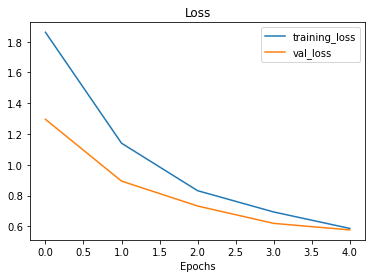

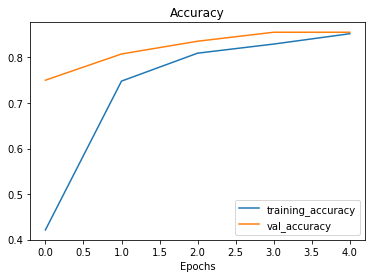

In [20]:
plot_loss_curves(istory)

In [21]:
input_shape = (1, 4, 4, 3)

tf.random.set_seed(42)
input_tensor = tf.random.normal(input_shape)
print(f"Random input tensor:\n {input_tensor}\n")

global_average_pooled_tensor = tf.keras.layers.GlobalAveragePooling2D()(input_tensor)
print(f"2D global average pooled random tensor:\n {global_average_pooled_tensor}\n")

print(f"Shape of input tensor: {input_tensor.shape}")
print(f"Shape of 2D global averaged pooled input tensor: {global_average_pooled_tensor.shape}")

Random input tensor:
 [[[[ 0.3274685  -0.8426258   0.3194337 ]
   [-1.4075519  -2.3880599  -1.0392479 ]
   [-0.5573232   0.539707    1.6994323 ]
   [ 0.28893656 -1.5066116  -0.26454744]]

  [[-0.59722406 -1.9171132  -0.62044144]
   [ 0.8504023  -0.40604794 -3.0258412 ]
   [ 0.9058464   0.29855987 -0.22561555]
   [-0.7616443  -1.891714   -0.9384712 ]]

  [[ 0.77852213 -0.47338897  0.97772694]
   [ 0.24694404  0.20573747 -0.5256233 ]
   [ 0.32410017  0.02545409 -0.10638497]
   [-0.6369475   1.1603122   0.2507359 ]]

  [[-0.41728497  0.40125778 -1.4145442 ]
   [-0.59318566 -1.6617213   0.33567193]
   [ 0.10815629  0.2347968  -0.56668764]
   [-0.35819843  0.88698626  0.5274477 ]]]]

2D global average pooled random tensor:
 [[-0.09368646 -0.45840445 -0.28855976]]

Shape of input tensor: (1, 4, 4, 3)
Shape of 2D global averaged pooled input tensor: (1, 3)


In [22]:
tf.reduce_mean(input_tensor, axis=[1, 2]) 

<tf.Tensor: shape=(1, 3), dtype=float32, numpy=array([[-0.09368646, -0.45840445, -0.28855976]], dtype=float32)>

In [23]:
!python -m wget  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_1_percent.zip


Saved under 10_food_classes_1_percent (4).zip


In [24]:
unzip_data("10_food_classes_1_percent.zip")
train_dir = "10_food_classes_1_percent/train/"
test_dir = "10_food_classes_1_percent/test/"

In [25]:
walk_through_dir("10_food_classes_1_percent")

There are 2 directories and 0 images in '10_food_classes_1_percent'.
There are 10 directories and 0 images in '10_food_classes_1_percent\test'.
There are 0 directories and 250 images in '10_food_classes_1_percent\test\chicken_curry'.
There are 0 directories and 250 images in '10_food_classes_1_percent\test\chicken_wings'.
There are 0 directories and 250 images in '10_food_classes_1_percent\test\fried_rice'.
There are 0 directories and 250 images in '10_food_classes_1_percent\test\grilled_salmon'.
There are 0 directories and 250 images in '10_food_classes_1_percent\test\hamburger'.
There are 0 directories and 250 images in '10_food_classes_1_percent\test\ice_cream'.
There are 0 directories and 250 images in '10_food_classes_1_percent\test\pizza'.
There are 0 directories and 250 images in '10_food_classes_1_percent\test\ramen'.
There are 0 directories and 250 images in '10_food_classes_1_percent\test\steak'.
There are 0 directories and 250 images in '10_food_classes_1_percent\test\sushi'

In [26]:
import tensorflow as tf

shape = (224,224)

train_data = tf.keras.preprocessing.image_dataset_from_directory(train_dir, label_mode='categorical',
                                                                batch_size=32, image_size = shape)

test_data = tf.keras.preprocessing.image_dataset_from_directory(test_dir, label_mode='categorical', batch_size=32, 
                                                               image_size=shape)

Found 70 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [27]:
70/5

14.0

In [28]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing

In [29]:
data_augmentation = tf.keras.models.Sequential([
  preprocessing.RandomFlip("horizontal"),
  preprocessing.RandomRotation(0.2),
  preprocessing.RandomZoom(0.2),
  preprocessing.RandomHeight(0.2),
  preprocessing.RandomWidth(0.2),
  # preprocessing.Rescaling(1./255) # keep for ResNet50V2, remove for EfficientNetB0
], name ="data_augmentation")

In [30]:
import os
import random

In [31]:
import matplotlib.image as mpimg

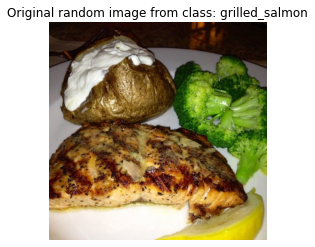

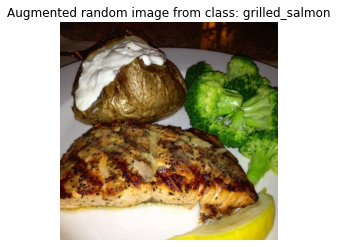

In [32]:
target_class = random.choice(train_data.class_names) 
target_dir = "10_food_classes_1_percent/train/" + target_class 
random_image = random.choice(os.listdir(target_dir)) 
random_image_path = target_dir + "/" + random_image 
img = mpimg.imread(random_image_path) 
plt.imshow(img) 
plt.title(f"Original random image from class: {target_class}")
plt.axis(False);

# Augment the image
augmented_img = data_augmentation(tf.expand_dims(img, axis=0)) 
plt.figure()
plt.imshow(tf.squeeze(augmented_img)/255.) 
plt.title(f"Augmented random image from class: {target_class}")
plt.axis(False);

In [33]:
input_shape = (224, 224, 3)
base_model = tf.keras.applications.EfficientNetB0(include_top=False)
base_model.trainable = False

inputs = layers.Input(shape=input_shape, name="Input Layer")

x = data_augmentation(inputs)

x = base_model(x, training = False)

x = layers.GlobalAveragePooling2D(name = "Global_Average_Pooling")(x)

outputs = layers.Dense(10, activation='softmax', name="Output_Layer")(x)

In [34]:
model_1 = tf.keras.Model(inputs,outputs)

In [35]:
model_1.compile(loss='categorical_crossentropy', optimizer='adam', metrics='accuracy')

In [36]:
history_1 = model_1.fit(train_data, epochs=5, steps_per_epoch=len(train_data), validation_data=test_data, 
                       validation_steps=int(0.25* len(test_data)), 
                    callbacks =[create_tensorboard_callback("transfer_learning", "1_percent_data_aug")])

Saving TensorBoard log files to: transfer_learning/1_percent_data_aug/20230110-230118
Epoch 1/5
3/3 [==============================] - 26s 10s/step - loss: 2.4031 - accuracy: 0.0714 - val_loss: 2.2287 - val_accuracy: 0.1826
Epoch 2/5
3/3 [==============================] - 21s 10s/step - loss: 2.1638 - accuracy: 0.2000 - val_loss: 2.1226 - val_accuracy: 0.2697
Epoch 3/5
3/3 [==============================] - 21s 10s/step - loss: 1.9773 - accuracy: 0.3571 - val_loss: 2.0055 - val_accuracy: 0.3536
Epoch 4/5
3/3 [==============================] - 21s 10s/step - loss: 1.7675 - accuracy: 0.4857 - val_loss: 1.9150 - val_accuracy: 0.4062
Epoch 5/5
3/3 [==============================] - 19s 9s/step - loss: 1.6668 - accuracy: 0.6000 - val_loss: 1.8390 - val_accuracy: 0.4424


In [37]:
model_1.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input Layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 data_augmentation (Sequenti  (None, None, None, 3)    0         
 al)                                                             
                                                                 
 efficientnetb0 (Functional)  (None, None, None, 1280)  4049571  
                                                                 
 Global_Average_Pooling (Glo  (None, 1280)             0         
 balAveragePooling2D)                                            
                                                                 
 Output_Layer (Dense)        (None, 10)                12810     
                                                                 
Total params: 4,062,381
Trainable params: 12,810
Non-traina

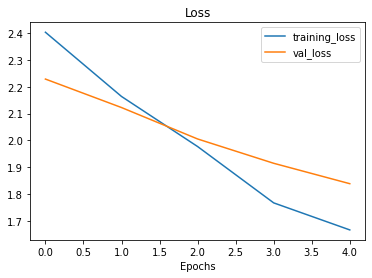

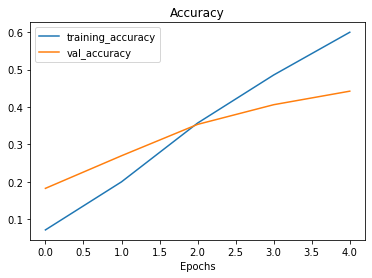

In [38]:
plot_loss_curves(history_1)

In [39]:
train_dir_10_percent = "10_food_classes_10_percent/train/"
test_dir = "10_food_classes_10_percent/test/"

In [40]:
import tensorflow as tf

IMG_SIZE = (224, 224)

train_data_10 = tf.keras.preprocessing.image_dataset_from_directory(train_dir_10_percent,
                                                                            label_mode="categorical",
                                                                            image_size=IMG_SIZE)

test_data =tf.keras.preprocessing.image_dataset_from_directory(test_dir, label_mode='categorical', image_size=IMG_SIZE)

Found 750 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [41]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing
from tensorflow.keras.models import Sequential

data_augmentation = Sequential([
    preprocessing.RandomFlip('horizontal'),
    preprocessing.RandomHeight(0.2),
    preprocessing.RandomWidth(0.2),
    preprocessing.RandomZoom(0.2),
    preprocessing.RandomRotation(0.2),
], name='data_augmentation')

In [45]:
input_shape = (224,224, 3)
base_model = tf.keras.applications.EfficientNetB0(include_top=False)
base_model.trainable = False

In [50]:
inputs = layers.Input(shape=input_shape, name = 'input layer')
x = data_augmentation(inputs)
x = base_model(x, training=False)
x = layers.GlobalAveragePooling2D(name='Global_avg_pooling')(x)
outputs = layers.Dense(10, activation='softmax', name='output_layer')(x)

In [51]:
model_2 = tf.keras.Model(inputs, outputs)

In [52]:
model_2.compile(loss='accuracy', optimizer='adam', metrics='accuracy')

In [53]:
checkpoint_path = "ten_percent_model_checkpoints_weights/checkpoint.ckpt"

In [54]:
checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                         save_weights_only=True, 
                                                         save_best_only=False, 
                                                         save_freq="epoch",
                                                         verbose=1)

In [58]:
initial_epochs = 5
history_10_percent_data_aug = model_2.fit(train_data_10,
                                          epochs=initial_epochs,
                                          validation_data=test_data,
                                          validation_steps=int(0.25 * len(test_data)), # do less steps per validation (quicker)
                                          callbacks=[create_tensorboard_callback("transfer_learning", "10_percent_data_aug"), 
                                                     checkpoint_callback])

Saving TensorBoard log files to: transfer_learning/10_percent_data_aug/20230110-232103
Epoch 1/5


TypeError: 'NoneType' object is not callable